# Метод прогонки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Уравнение в общем виде:  
$$ y'' + p(x)y' + q(x)y = f(x) $$  

Коэффициенты в нашем случае:

In [2]:
def p(x):
    return 0

def q(x):
    return -10 - np.sin(2 * np.pi * x)

def f(x):
    return np.cos(2 * np.pi * x)

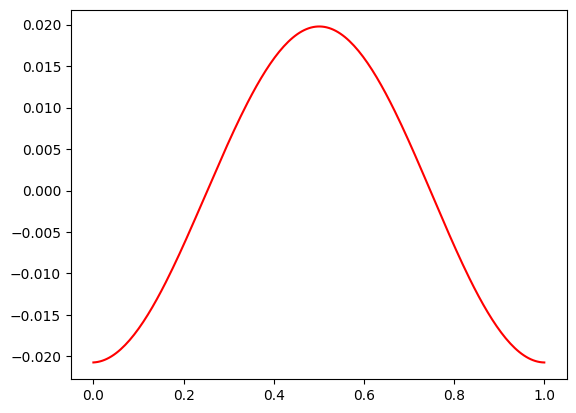

In [3]:
def RunThrough(p, q, f, h, T):
    N = int(T / h)
    x_values = np.linspace(0, T, N)
    
    # Коэффициенты разностной схемы
    a = 1 - h / 2 * np.array([p(x) for x in x_values])
    b = 2 - h**2 * np.array([q(x) for x in x_values])
    c = 1 + h / 2 * np.array([p(x) for x in x_values])
    phi = h**2 * np.array([f(x) for x in x_values])
    
    # Реализация метода прогонки
    alpha = np.zeros(N)
    beta = np.zeros(N)
    gamma = np.zeros(N)
    m = np.zeros(N)
    v = np.zeros(N)
    y_values = np.zeros(N)

    alpha[1] = c[0] / b[0]
    beta[1] = -phi[0] / b[0]
    gamma[1] = a[0] / b[0]

    for k in range(1, N - 1):
        alpha[k + 1] = c[k] / (b[k] - alpha[k] * a[k])
        beta[k + 1] = (a[k] * beta[k] - phi[k]) / (b[k] - alpha[k] * a[k])
        gamma[k + 1] = a[k] * gamma[k] / (b[k] - alpha[k] * a[k])

    m[-1] = -c[-1] / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])
    v[-1] = (phi[-1] - a[-1] * beta[-1]) / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])

    for n in range(N - 2, -1, -1):
        m[n] = alpha[n + 1] * m[n + 1] + gamma[n + 1] * m[-1]
        v[n] = beta[n + 1] + alpha[n + 1] * v[n + 1] + gamma[n + 1] * v[-1]

    y_values[0] = v[0] / (1 - m[0])
    y_values[-1] = m[-1] * y_values[0] + v[-1]

    for n in range(N - 2, -1, -1):
        y_values[n] = alpha[n + 1] * y_values[n + 1] + beta[n + 1] + gamma[n + 1] * y_values[-1]

    return x_values, y_values



h = 0.005
T = 1.0

# Решение уравнения
x_values, y_values = RunThrough(p, q, f, h, T)

# Построение графика
plt.plot(x_values, y_values, marker='', color='red')
plt.show()